In [1]:
from ipywidgets import interact
from fastai.basics import *

In [2]:
plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

In [3]:
def quad(a, b, c, x): return a*x**2 + b*x + c

In [4]:
??partial

In [5]:
def mk_quad(a,b,c): return partial(quad, a,b,c)

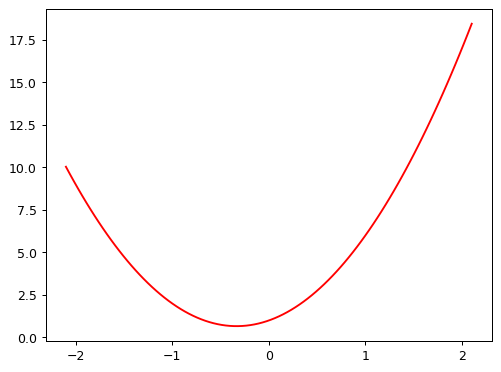

In [6]:
quad_func = mk_quad(3,2,1)
plot_function(quad_func)

In [7]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)

In [14]:
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

tensor([[-2.0000],
        [-1.7895]]) tensor([[11.8690],
        [ 6.5433]], dtype=torch.float64)


<ipython-input-14-7891ca75956d>:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)


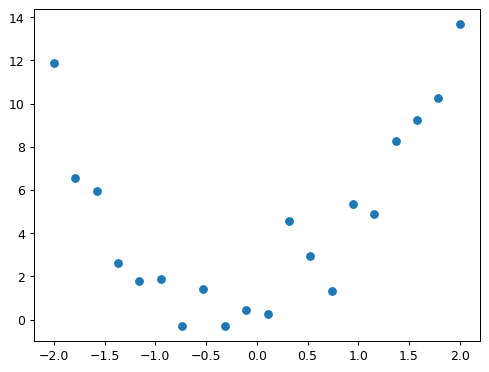

In [15]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(quad_func(x), 0.15, 1.5)
print(x[:2],y[:2])
plt.scatter(x,y);

In [16]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [18]:
#MAE
def mae(preds, acts): return (torch.abs(preds-acts)).mean()

In [19]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [20]:
def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x), y)

In [23]:
params = torch.tensor([1.1,1.1,1.1])
params.requires_grad_()
for i in range(20):
    loss = quad_mae(params)
    loss.backward()
    with torch.no_grad():
      params -= params.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=2.42
step=1; loss=2.40
step=2; loss=2.36
step=3; loss=2.30
step=4; loss=2.21
step=5; loss=2.11
step=6; loss=1.98
step=7; loss=1.85
step=8; loss=1.72
step=9; loss=1.58
step=10; loss=1.46
step=11; loss=1.35
step=12; loss=1.22
step=13; loss=1.17
step=14; loss=1.17
step=15; loss=1.26
step=16; loss=1.40
step=17; loss=1.55
step=18; loss=1.70
step=19; loss=1.83


In [24]:
loss = quad_mae(params)
print(loss,params)

tensor(1.9472, dtype=torch.float64, grad_fn=<MeanBackward0>) tensor([3.1693, 1.3089, 1.6910], requires_grad=True)


In [25]:
#NN can approximate anything computable given enough freedom
def relu(m,b,x):
    y = m*x+b
    return torch.clip(y, 0.)

In [29]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(relu, m,b), ylim=(-1,4))


interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [32]:
def double_relu(m1,b1,m2,b2,m3,b3,x):
    return relu(m1,b1,x) + relu(m2,b2,x) + relu(m3,b3,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5 , m3 = 1.1 , b3=1.1)
def plot_double_relu(m1, b1, m2, b2,m3,b3):
    plot_function(partial(double_relu, m1,b1,m2,b2,m3,b3), ylim=(-1,6))


interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…